Step 1. Import the necessary libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Step 2. Import the dataset

Step 3. Assign it to a variable called chipo.

In [4]:
chipo = pd.read_csv("C:\\Users\\Hajer\\Desktop\\github Exer\\analyse de données\\exercice_github\\chipotle.txt",sep='\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 4. See the first 10 entries

In [5]:
df_10=chipo.head(10)
df_10

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [6]:
nb_observations=len(chipo)
nb_observations

4622

Step 6. What is the number of columns in the dataset?

In [7]:
nb_columns=len(chipo.columns)
nb_columns

5

Step 7. Print the name of all the columns.

In [8]:
name_columns=chipo.columns
name_columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [9]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [10]:
item_orders = chipo.pivot_table(values=['quantity', 'order_id'], index='item_name', aggfunc={'quantity':'sum','order_id':'count'})

item_orders_df = pd.DataFrame(item_orders, columns=['order_id','quantity'])
sorted_item_orders_df = item_orders_df.sort_values(by='quantity', ascending=False)
df_max= sorted_item_orders_df.head(1)
df_max

,order_id,quantity
item_name,,
Chicken Bowl,726,761


Step 10. For the most-ordered item, how many items were ordered?

In [11]:

item_orders_df = pd.DataFrame(item_orders, columns=['order_id','quantity'])
sorted_item_orders_df = item_orders_df.sort_values(by='quantity', ascending=False)
most_ordered_item= sorted_item_orders_df.head(1)
most_ordered_item

,order_id,quantity
item_name,,
Chicken Bowl,726,761


In [12]:
most_ordered_quantity = most_ordered_item['quantity'].values[0]
most_ordered_quantity

761

Step 11. What was the most ordered item in the choice_description column?

In [13]:
item_orders1 = pd.pivot_table(chipo, values=['order_id', 'quantity'],index='choice_description',     
                                   aggfunc={'order_id': 'count', 'quantity': 'sum'} 
                                   )

item_orders_df1 = pd.DataFrame(item_orders1, columns=['order_id','quantity'])
sorted_item_orders_df1 = item_orders_df1.sort_values(by='order_id', ascending=False)
df_max1= sorted_item_orders_df1.head(1)
df_max1

,order_id,quantity
choice_description,,
[Diet Coke],134,159


Step 12. How many items were orderd in total?

In [14]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered


4972

Step 13.a. Check the item price type

In [15]:
chipo['item_price'].dtype

dtype('O')

Step 13.b. Create a lambda function and change the type of item price

In [16]:
import re
convert_to_float = lambda x: pd.to_numeric(re.sub(r'[\$,]', '', str(x)), errors='coerce')

chipo['item_price'] = chipo['item_price'].apply(convert_to_float)
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

Step 13.c. Check the item price type

In [17]:
chipo['item_price'].dtype

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [18]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
revenue_total = chipo['revenue'].sum()
print(f" Revenue was : ${revenue_total:.2f}")

 Revenue was : $39237.02


Step 15. How many orders were made in the period?

In [19]:
number_of_orders = chipo['order_id'].nunique()
number_of_orders

1834

Step 16. What is the average revenue amount per order?

In [20]:
average=chipo['revenue'].mean()
average

8.48918649935093

In [21]:

item_orders1 = chipo.groupby('order_id')[['revenue']].sum()
item_orders1.mean()

revenue    21.394231
dtype: float64

In [22]:
item_orders_pivot = pd.pivot_table(chipo, values='revenue', index='order_id', aggfunc='sum')

# Calculate the average revenue amount per order
average_revenue_per_order = item_orders_pivot.mean()
average_revenue_per_order

revenue    21.394231
dtype: float64

Step 17. How many different items are sold?

In [23]:
num_different_items = chipo['item_name'].nunique()
num_different_items

50

Step 18. What are the top 5 most ordered items?

In [24]:
item_orders = chipo.pivot_table(values=['quantity', 'order_id'], index='item_name', aggfunc={'quantity':'sum','order_id':'count'})

item_orders_df = pd.DataFrame(item_orders, columns=['order_id'])
sorted_item_orders_df = item_orders_df.sort_values(by='order_id', ascending=False)
df_max= sorted_item_orders_df.head()
df_max

,order_id
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479
Steak Burrito,368
Canned Soft Drink,301


Step 19. What is the average quantity for each item?

In [25]:
 average_quantity=chipo.groupby('item_name')['quantity'].mean()
average_quantity

item_name
6 Pack Soft Drink                        1.018519
Barbacoa Bowl                            1.000000
Barbacoa Burrito                         1.000000
Barbacoa Crispy Tacos                    1.090909
Barbacoa Salad Bowl                      1.000000
Barbacoa Soft Tacos                      1.000000
Bottled Water                            1.302469
Bowl                                     2.000000
Burrito                                  1.000000
Canned Soda                              1.211538
Canned Soft Drink                        1.166113
Carnitas Bowl                            1.044118
Carnitas Burrito                         1.016949
Carnitas Crispy Tacos                    1.142857
Carnitas Salad                           1.000000
Carnitas Salad Bowl                      1.000000
Carnitas Soft Tacos                      1.000000
Chicken Bowl                             1.048209
Chicken Burrito                          1.068716
Chicken Crispy Tacos                    

Step 20. How many unique choices are there in the 'choice_description' column?

In [26]:
unique_choice_description = chipo['choice_description'].nunique()
unique_choice_description


1043

Step 21. What is the total revenue for each item?

In [27]:
 average_quantity=chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False)
average_quantity

item_name
Chicken Bowl                             8044.63
Chicken Burrito                          6387.06
Steak Burrito                            4236.13
Steak Bowl                               2479.81
Chips and Guacamole                      2475.62
Chicken Salad Bowl                       1506.25
Chicken Soft Tacos                       1199.01
Chips and Fresh Tomato Salsa             1033.96
Veggie Burrito                           1002.27
Veggie Bowl                               901.95
Barbacoa Burrito                          894.75
Carnitas Bowl                             830.71
Barbacoa Bowl                             672.36
Bottled Water                             649.18
Carnitas Burrito                          616.33
Canned Soft Drink                         603.75
Chips                                     580.34
Steak Soft Tacos                          554.55
Chicken Crispy Tacos                      524.11
Steak Salad Bowl                          391.15
Carnitas S

Step 22. What is the total quantity for each item?

In [28]:
total_quantity_per_item = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
total_quantity_per_item


item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


Step 23. What is the average price per item?



In [29]:
average_price_per_item = chipo.groupby('item_name')['item_price'].mean()
print(average_price_per_item)


item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 



What is the average price of items?

In [30]:
print("the average price of items is : ",chipo['item_price'].mean())

the average price of items is :  7.464335785374297


What is the most expensive item?

In [31]:
most_expensive_item = chipo.loc[chipo['item_price'].idxmax(),'item_name']
print("the most expensive item is : ",most_expensive_item)


the most expensive item is :  Chips and Fresh Tomato Salsa


What is the maximum quantity of items ordered in a single order?

In [32]:
max_quantity=chipo.groupby('order_id')['quantity'].max()
max_quantity.max()

15

Total des ventes par article :

Créez une fonction total_sales_per_item() qui retourne, pour chaque article, le total des ventes.

In [33]:
def total_sales_per_item() :
    total_per_item=pd.crosstab(index=chipo['item_name'],values=chipo['revenue'],columns='revenue',aggfunc='sum')
    return total_per_item
total_sales_per_item() 

col_0,revenue
item_name,
6 Pack Soft Drink,369.93
Barbacoa Bowl,672.36
Barbacoa Burrito,894.75
Barbacoa Crispy Tacos,138.71
Barbacoa Salad Bowl,106.40
Barbacoa Soft Tacos,250.46
Bottled Water,649.18
Bowl,74.00
Burrito,44.40


Articles les plus vendus :

Créez une fonction top_selling_items(n) qui retourne les N articles les plus vendus.

In [34]:
def top_selling_items(n):
    top_selling_items = chipo.groupby('item_name')['quantity'].sum().nlargest(n)
    
    return top_selling_items

top_selling_items(7) 

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Chips                  230
Steak Bowl             221
Name: quantity, dtype: int64

Statistiques des quantités commandées :

Créez une fonction order_quantity_stats() qui retourne des statistiques descriptives sur les quantités commandées, telles que la moyenne, la médiane, l'écart-type, etc.

In [35]:
def order_quantity_stats() :
    order_quantity_stats=chipo['quantity'].describe()
    return order_quantity_stats 
order_quantity_stats()

count    4622.000000
mean        1.075725
std         0.410186
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        15.000000
Name: quantity, dtype: float64

Variation de prix :

Créez une fonction price_variation() qui examine la variation des prix des articles.

In [36]:
def price_variation():
    price_variations = chipo.groupby('item_name')['item_price'].agg (['max','min'])
    price_variations ['variation']=price_variations['max']- price_variations['min']
    return price_variations['variation']
price_variation()

item_name
6 Pack Soft Drink                         6.49
Barbacoa Bowl                             3.06
Barbacoa Burrito                          3.06
Barbacoa Crispy Tacos                     9.51
Barbacoa Salad Bowl                       2.50
Barbacoa Soft Tacos                       2.76
Bottled Water                            13.91
Bowl                                     14.80
Burrito                                   0.00
Canned Soda                               3.27
Canned Soft Drink                         3.75
Carnitas Bowl                            26.26
Carnitas Burrito                          9.81
Carnitas Crispy Tacos                     8.99
Carnitas Salad                            0.00
Carnitas Salad Bowl                       2.50
Carnitas Soft Tacos                       2.76
Chicken Bowl                             24.75
Chicken Burrito                          26.81
Chicken Crispy Tacos                      9.01
Chicken Salad                             2.79
Chi

In [37]:
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


Distribution des prix :

Créez une fonction price_distribution() qui affiche un histogramme montrant la distribution des prix des articles.



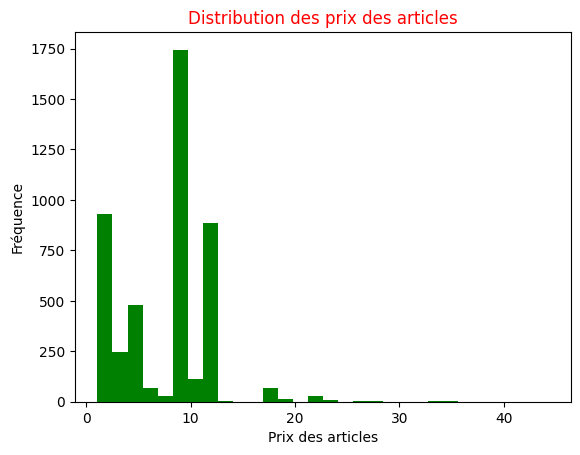

In [38]:
def price_distribution():
    plt.hist(chipo['item_price'], bins=30, color="green")
    plt.xlabel("Prix des articles")
    plt.ylabel("Fréquence")
    plt.title("Distribution des prix des articles", color="red")
    plt.show()

price_distribution()